# Solving equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

## Review: linear equations
To solve a system $Ax=b$ for x, we do the following:
* Define the matrix $A$ and the array $b$.
* Use x = np.linalg.solve(A,b)

**Example**

Solve 
$$\left[
\begin{array}[ccccc]
--2 & 1  & 0 & 0 & 0 \\
1  & -2 & 1 & 0 & 0 \\
0  &  1 & -2& 1 & 0 \\
0  &  0 & 1 & -2& 1 \\
0  &  0 & 0 & 1 & -2
\end{array}
\right]\cdot
\left[
\begin{array}[c] \\x_0\\x_1\\x_2\\x_2\\x_4\end{array}\right] = 
\left[\begin{array}[c] \\1\\1\\1\\1\\1\end{array}\right]$$


In [3]:
A = np.array([[-2,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,-2]])
b = np.ones(5)

x = np.linalg.solve(A,b)
x


array([-2.5, -4. , -4.5, -4. , -2.5])

Here's a [link](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) to more linear algebra operations.

## Nonlinear equations
### 1-D equations (1 equation in 1 unknown).

### Recall
* What are the key elements to solving nonlinear equations?
* List the parts, the form, and things you need.

### Exercise
* Before learning the details about solving equations using Python, see if you can guess how to solve the following equation using Python's solver ```fsolve```, based on what you need to solve equations:
$$f(x) = x^2-5.$$

In [4]:
from scipy.optimize import fsolve

def f(x):
    return x**2 - 5

x_guess = 1

x = fsolve(f, x_guess)
x


array([2.23606798])

Solving a nonlinear equation involves first putting it in the form $f(x)=0$. We know the function $f$ and we want to find the value of $x$ that gives $f(x)=0$.

To solve this, do the following:
* Define the function f(x)
* Set an initial guess for x.
* We need to import a library: ```from scipy.optimize import fsolve```
* Call the ```fsolve``` function: ```x = fsolve(f, x0)```
    * f is the name of the function you are solving, and x0 is your initial guess.
    


### Exercise

Solve for both roots of $$f(x) = x^2-5.$$

In [5]:
# the problem is solved above. Here's the solution using an anonymous function:

fsolve(lambda x: x**2 - 5, x_guess)

array([2.23606798])

### Multiple equations in multiple unknowns
* What do we do if we are solving multiple equations in multiple unknowns?
* For example, suppose we have $h(y,z)=0$ and $g(y,z)=0$. Such as:
$$h(y,z) = y+2z,$$
$$g(y,z) = \sin(y)/z.$$

* Do you think Python's ```fsolve``` function can handle this? 
* How will you go about specifying the problem?
* What if there were three equations in three unknowns? Four and four? etc.?
* If you were coding ```fsolve``` how would you account for all these possibilities?

#### General approach
* Instead of $f(x)=0$, we solve
* $\vec{f}(\vec{x})=\vec{0}$.
    * That is, $\vec{x}$ is a vector of unknowns, and $\vec{f}$ is a vector of functions.
    * $\vec{f}(\vec{x})$ takes a vector $\vec{x}$, and returns a vector $\vec{f}$.


#### Details
* Consider again the **two functions** for the **two unknowns**: $h(y,z) = 0$, and $g(y,z)=0$.
$$h(y,z)=y+2z,$$ $$g(y,z) = \sin(y)/z$$
* For computer solvers, we write using a generic, standard notation. 
    * <font color=red>**We want all solvers to look like $f(x)=0.$**</font>
* We would write these as $$f_0(x_0,x_1) = x_0+2x_1,$$ $$f_1(x_0,x_1) = \sin(x_0)/x_1,$$
which becomes: $$\left[\begin{matrix} f_0(x_0,x_1) \\ f_1(x_0,x_1)\end{matrix}\right] = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \left[\begin{matrix}0 \\ 0\end{matrix}\right],$$
or $$\vec{f}(\vec{x}) = \left[\begin{matrix}x_0+2x_1 \\ \sin(x_0)/x_1\end{matrix}\right] = \vec{0},$$
that is, $$\vec{f}(\vec{x})=\vec{0}.$$

* We solve the system just like before:
    * Just define the vector function. It takes an array of unknowns $\vec{x}$, and returns an array of function values $\vec{f}$.
    * We use the same solver, but we give an array of initial guesses $\vec{x}_0$.


**Note** Here is a [link](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to more information about the fsolve function with extra arguments that can give more control over the solution process.

### Exercise
* Solve the following two equations in two unknowns.
$$h(y,z)=y+2z,$$ 
$$g(y,z) = \sin(y)/z.$$
* Use $y_0=1$, and $z_0=2$ as an initial guess.

In [6]:
def hg(yz):
    y = yz[0]
    z = yz[1]
    
    h = y + 2*z
    g = np.sin(y)/z
    
    return np.array([h,g])

#---------------

yz_guess = np.array([1,2])

yz = fsolve(hg, yz_guess)

print("yz =", yz, "hg =", hg(yz))

yz = [ 9.42477796 -4.71238898] hg = [0.00000000e+00 4.82244674e-15]


### Excercise

Solve the following system of three equations in three unknowns:

$$x^2 + y^2 = 1,$$
$$xy + yz = -1.1,$$
$$y^2 + z^2 = 2.$$

A reasonable guess for all variables is $x=y=z=2.$


In [7]:
def f(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    
    f0 = x**2 + y**2 - 1
    f1 = x*y + y*z + 1.1
    f2 = y**2 + z**2 - 2
    
    return np.array([f0, f1, f2])

#------------

xyz_guess = np.array([2.0, 2.0, 2.0])

xyz = fsolve(f, xyz_guess)

print(xyz)

[ 0.10056089 -0.99493091  1.00504353]


### Exercise

The Colbrook equation is used to compute pressure drops across pipes, and therefore to compute pumping requirements and costs.

The Colebrook equation is given by
$$\frac{1}{\sqrt{f}} = -2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{Re\sqrt{f}}\right),$$
or,
$$F(f, Re, \epsilon/D) = \frac{1}{\sqrt{f}} + 2\log_{10}\left(\frac{\epsilon/D}{3.7}+\frac{2.51}{Re\sqrt{f}}\right)=0.$$

* Solve the Colbrook equation for $f$, for each $Re$ listed below, for the given single value of $\epsilon/D$.  
* Plot the result of $f(Re)$ with $Re$ on a log scale.

**Approach**
* Start simple, then add more functionality.
* Verify results at each step.
* Question: what are the different parts required?

for Re=5000, f = [0.03849536]


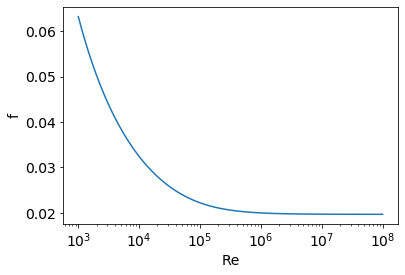

In [12]:
Re     = np.logspace(3,8,1000)
epsD   = 0.001
fguess = 0.01

def F(f, Re, epsD):
    return 1/np.sqrt(f) + 2*np.log10(epsD/3.7 + 2.51/Re/np.sqrt(f))

# first, just get it to work with just one Re

f = fsolve(F, fguess, args=(5000, epsD))
print("for Re=5000, f =", f)

# now, make an array of f and fill in each value in a loop:

f = np.empty(len(Re))
for i in range(len(f)):
    f[i] = fsolve(F, fguess, args=(Re[i], epsD))   # note the Re[i]
    
#--------- plot results

plt.rc('font', size=14)
plt.semilogx(Re, f)
plt.xlabel('Re')
plt.ylabel('f');
